# Ford GoBike System Data

_This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv("dataset.csv")

## Quick Tour

In [3]:
# view first 5 entries
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# view last 5 entries
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [5]:
# view some random samples
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
50089,914,2019-02-21 19:41:50.0300,2019-02-21 19:57:04.3500,50.0,2nd St at Townsend St,37.780526,-122.390288,356.0,Valencia St at Clinton Park,37.769188,-122.422285,6420,Subscriber,1983.0,Male,No
152125,1266,2019-02-06 16:12:25.1320,2019-02-06 16:33:31.2790,182.0,19th Street BART Station,37.809013,-122.268247,155.0,Emeryville Public Market,37.840521,-122.293528,2371,Subscriber,1993.0,Male,No
114357,662,2019-02-12 09:35:58.6370,2019-02-12 09:47:00.6510,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,257.0,Fifth St at Delaware St,37.870407,-122.299676,358,Subscriber,1997.0,Female,No
18802,678,2019-02-26 17:53:26.3820,2019-02-26 18:04:44.4020,73.0,Pierce St at Haight St,37.771793,-122.433708,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5059,Subscriber,1995.0,Male,No
131912,154,2019-02-09 10:30:38.8660,2019-02-09 10:33:13.3540,351.0,10th St at University Ave,37.869060,-122.293400,257.0,Fifth St at Delaware St,37.870407,-122.299676,4501,Subscriber,1978.0,Male,No


In [6]:
# check the shape of the dataset ( understanding the number of observations and variables )
df.shape

(183412, 16)

In [7]:
# check the data types of the dataset
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [8]:
# check the number of unique values in user_type variable
print(df.user_type.nunique())
df.user_type.unique()

2


array(['Customer', 'Subscriber'], dtype=object)

In [9]:
# check the member genders recorded for the dataset
print(df.member_gender.nunique())
df.member_gender.unique()

3


array(['Male', nan, 'Other', 'Female'], dtype=object)

In [10]:
# check for missing values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
# check detailed info about dataset construct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [12]:
# check statistical summary of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Tour Notes

_There are 183,412 observations on **Ford GoBike System Data** ( Greater San Francisco Bay Area ) which spans across 16 variables. There are two type of observable users from the recorded observations **Customer** and **Subscriber** falling within the birth year bracket of 1878 - 2001. The highest commute duration recorded for sits around **85,444 seconds** while the lowest is **61 seconds**. These records are tracked within genders -> **Male, Female & Other**_

**DISCLAIMER**

_Tour Note should be taken lightly, as it's just an attempt to understand the data in it's raw form - kindly look at [Explanatory Data Analysis](#Explanatory-Data-Analysis) for better and accurate dataset brief_

### Observations

- start_time and end_time are type object
- some values on member_gender has got `nan` values
- member_gender is of type object
- user_type is of type object
- 197 data is missing from end_station_id, end_station_name, start_station_id, start_station_name
- 8265 data is missing from member_birth_year and member_gender

### Project Questions

1) When are most trips taken in terms of time of day, day of the week, or month of the year?
2) How long does the average trip take?
3) Does the above depend on if a user is a subscriber or customer?

### Questions that comes to mind ( Curiousity Quest )

1) Which user type has the most transaction record
2) Age group of subscribers
3) Gender with most rides
4) Are there repeating records for any given station

## Data Transformation ( Preprocessing / Data Cleaning X Wrangling )

### Parse start_time and end_time datatype to datetime

In [13]:
# check the current start_time and end_time datatype
df[['start_time', 'end_time']].dtypes

start_time    object
end_time      object
dtype: object

In [14]:
# parse start_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

In [15]:
# check that start_time is now of type datetime
print(df.start_time.dtype.name)
df.start_time.dtype

datetime64[ns]


dtype('<M8[ns]')

In [16]:
# parse end_time to datetime
df['end_time'] = pd.to_datetime(df['end_time'])

In [17]:
# check that start_time is now of type datetime
print(df.end_time.dtype.name)
df.end_time.dtype

datetime64[ns]


dtype('<M8[ns]')

### Get rid of `nan` member_gender

In [18]:
# check for the member_gender whose value is `nan`
df[df['member_gender'].isna()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No


In [19]:
# check the total count for the member_gender whose value is `nan`
len(df[df['member_gender'].isna()])

8265

#### Approach Details

The requirements to answer the project questions doesn't warrant any interactions with gender, which makes it safe for all observations to be left as is. Removing 8,265 observations would be alot to take off when the missing values has no contribution to the analysis.

### Change user_type to categorical type

In [20]:
# check that user_type datatype
df.user_type.dtype

dtype('O')

In [21]:
# check if there're any missing entries for user type
len(df[df['user_type'].isna()])

0

In [22]:
# switch user_type to categorical type
df['user_type'] = df['user_type'].astype('category')

In [23]:
df['user_type'].dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

## Re-Explore missing values 
197 missing from end_station_id, end_station_name, start_station_id, start_station_name

In [24]:
len(df[df['end_station_id'].isna()])

197

In [25]:
df[df['end_station_id'].isna()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes


start_station_name, end_station_name and ids has got missing values. To validate the accuracy of these data, I checked the first records returned from `.head()` method call.

From above rendering with `.head()` method, the coordinate proves valid after manually cross-checking with google maps. For the first five, the coordinate points to San Jose ( which is amongst the Greater Bay Area). So we'll keep them as is. 

## Exploratory Data Analysis

having observed the dataset about 8263 observations has got missing values resulting in about 174,952 valid records when the missing values are removed. We'll proceed with the exploration of the dataset as is to answer the project's questions as the missing entries doesn't play crucial role to answering the questions. Below are the questions:

- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

Although we could integrate with google maps ( Directions API ) to get the location name for the station coordinate but, None of the above questions warrants that we work with the stations. Neither does it warrant we work with gender. So for now we're safe. 

### when are most trips taken in terms of time of the day ( QUESTION )

In [26]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [27]:
# copy relevant data for analysis
trip_df = df[['start_time', 'end_time', 'duration_sec', 'user_type', 'bike_share_for_all_trip', 'bike_id']].copy()
trip_df.head()

,start_time,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,52185,Customer,No,4902
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,42521,Customer,No,2535
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,61854,Customer,No,5905
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,36490,Subscriber,No,6638
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,1585,Subscriber,Yes,4898


In [28]:
# set start_time as the dataset index
time_idx_trip_df = (
    trip_df.set_index("start_time")
    .to_period("H") # change index to be in period form holding hourly values
)

In [29]:
time_idx_trip_df.head()

,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id
start_time,,,,,
2019-02-28 17:00,2019-03-01 08:01:55.975,52185,Customer,No,4902
2019-02-28 18:00,2019-03-01 06:42:03.056,42521,Customer,No,2535
2019-02-28 12:00,2019-03-01 05:24:08.146,61854,Customer,No,5905
2019-02-28 17:00,2019-03-01 04:02:36.842,36490,Subscriber,No,6638
2019-02-28 23:00,2019-03-01 00:20:44.074,1585,Subscriber,Yes,4898


In [30]:
# set index to just hold the time of the day in format Hour:Minute
time_idx_trip_df.index = time_idx_trip_df.index.strftime("%H:%m")

In [31]:
# Confirm that the index is now in Hour:Minute format
time_idx_trip_df.head()

,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id
start_time,,,,,
17:02,2019-03-01 08:01:55.975,52185,Customer,No,4902
18:02,2019-03-01 06:42:03.056,42521,Customer,No,2535
12:02,2019-03-01 05:24:08.146,61854,Customer,No,5905
17:02,2019-03-01 04:02:36.842,36490,Subscriber,No,6638
23:02,2019-03-01 00:20:44.074,1585,Subscriber,Yes,4898


In [32]:
# confirm that the observations are still accurate
time_idx_trip_df.shape

(183412, 5)

In [33]:
# select seaborn's color palette to use for plot
color_palette = sb.color_palette()[0]

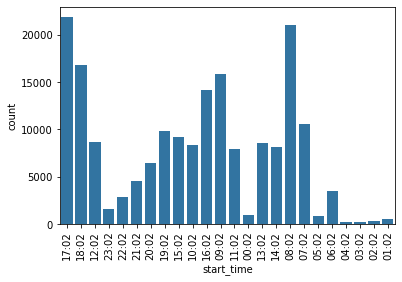

In [34]:
sb.countplot(x=time_idx_trip_df.index, color=color_palette)
plt.xticks(rotation=90);

Most trip are recorded late in the evening **17:02 pm** and early in the morning (during work hour) **08:02 am** day time followed by 

### when are most trips taken in terms of day of the week ( QUESTION )

In [35]:
# create a copy of trip dataset
day_idx_trip_df = (
    trip_df.set_index("start_time")
    .to_period("D")   # conversion to period is very important
)

In [36]:
# verify the copy
day_idx_trip_df.head()

,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id
start_time,,,,,
2019-02-28,2019-03-01 08:01:55.975,52185,Customer,No,4902
2019-02-28,2019-03-01 06:42:03.056,42521,Customer,No,2535
2019-02-28,2019-03-01 05:24:08.146,61854,Customer,No,5905
2019-02-28,2019-03-01 04:02:36.842,36490,Subscriber,No,6638
2019-02-28,2019-03-01 00:20:44.074,1585,Subscriber,Yes,4898


In [37]:
# convert start time index to local weekday 
day_idx_trip_df.index = day_idx_trip_df.index.strftime("%A")

In [38]:
# confirm local weekday conversion 
day_idx_trip_df.sample(3)

,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id
start_time,,,,,
Wednesday,2019-02-13 08:53:35.032,458,Subscriber,No,5047
Wednesday,2019-02-20 19:29:58.614,1015,Subscriber,No,6608
Wednesday,2019-02-20 09:42:52.220,748,Subscriber,No,3589


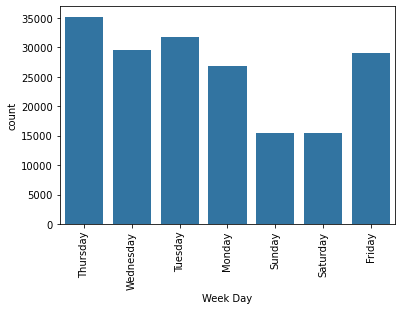

In [39]:
sb.countplot(x=day_idx_trip_df.index, color=color_palette)
plt.xticks(rotation=90);
plt.xlabel("Week Day");

Thursday clearly shows the day of the week when most trip are taking with a total value of **35,000** recorded for thursday

#### Further Analysis

_Having known that most of the trips are recorded on Thursday, at what time are the trip recorded for on thursday ?_

In [40]:
thursday_trip_df = trip_df.copy()

In [41]:
thursday_trip_df.head()

,start_time,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,52185,Customer,No,4902
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,42521,Customer,No,2535
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,61854,Customer,No,5905
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,36490,Subscriber,No,6638
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,1585,Subscriber,Yes,4898


In [42]:
# Create new variable to hold local weekday
thursday_trip_df['weekday'] = pd.to_datetime(thursday_trip_df.start_time).apply(lambda x: x.strftime("%A"))

In [43]:
thursday_trip_df.sample(3)

,start_time,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id,weekday
4000,2019-02-28 16:42:49.962,2019-02-28 16:46:34.383,224,Subscriber,No,5881,Thursday
86378,2019-02-17 12:56:42.457,2019-02-17 13:04:54.489,492,Subscriber,No,5912,Sunday
66932,2019-02-20 08:25:01.130,2019-02-20 08:31:06.625,365,Subscriber,No,6603,Wednesday


In [44]:
# create new variable to hold time of the day
thursday_trip_df['time'] = thursday_trip_df.start_time.apply(lambda x: x.strftime("%H:%m"))

In [45]:
thursday_trip_df.sample(3)

,start_time,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id,weekday,time
152375,2019-02-06 16:00:22.666,2019-02-06 16:03:40.063,197,Subscriber,No,5217,Wednesday,16:02
166422,2019-02-04 18:49:41.161,2019-02-04 19:01:38.126,716,Subscriber,No,2947,Monday,18:02
176088,2019-02-02 12:27:16.837,2019-02-02 12:41:53.171,876,Subscriber,No,4768,Saturday,12:02


In [46]:
# only select thursday trip
thursday_trip_df = thursday_trip_df[thursday_trip_df['weekday'] == 'Thursday']

In [47]:
thursday_trip_df.sample(3)

,start_time,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id,weekday,time
5043,2019-02-28 14:15:00.691,2019-02-28 14:20:43.089,342,Subscriber,No,4658,Thursday,14:02
103525,2019-02-14 12:34:07.720,2019-02-14 12:38:02.795,235,Subscriber,Yes,4683,Thursday,12:02
51269,2019-02-21 18:15:16.460,2019-02-21 18:19:26.005,249,Subscriber,No,2674,Thursday,18:02


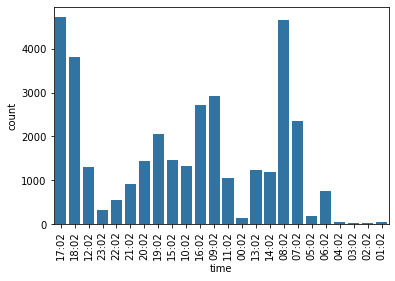

In [48]:
sb.countplot(x=thursday_trip_df.time, color=color_palette)
plt.xticks(rotation=90);

Around **4,900** trip records was tracked on **17:02** on Thursday

### when are most trips taken in terms of Month of the year ( QUESTION )

In [49]:
# make a copy of trip dataset 
month_trip_df = trip_df.copy()

In [50]:
month_trip_df.sample(3)

,start_time,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id
68317,2019-02-19 23:58:58.720,2019-02-20 00:12:24.764,806,Subscriber,No,4647
67609,2019-02-20 07:34:38.360,2019-02-20 07:51:54.669,1036,Subscriber,No,1493
133292,2019-02-08 19:23:48.263,2019-02-08 19:32:54.035,545,Customer,No,1044


In [51]:
# create a new variable off the start time for month 
month_trip_df['month'] = month_trip_df.start_time.apply(lambda x: x.strftime("%B"))

In [52]:
month_trip_df.sample(3)

,start_time,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id,month
84983,2019-02-17 15:49:51.325,2019-02-17 16:25:47.241,2155,Subscriber,No,6201,February
99397,2019-02-14 19:42:02.856,2019-02-14 20:13:13.317,1870,Customer,No,6233,February
62926,2019-02-20 16:15:40.936,2019-02-20 16:20:50.322,309,Subscriber,No,6403,February


In [53]:
# create a new variable off the start time for year 
month_trip_df['year'] = month_trip_df.start_time.apply(lambda x: x.strftime("%Y"))

In [54]:
month_trip_df.sample(3)

,start_time,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id,month,year
52300,2019-02-21 17:24:21.910,2019-02-21 17:27:39.228,197,Subscriber,No,5619,February,2019
161562,2019-02-05 14:12:49.738,2019-02-05 14:37:03.311,1453,Customer,No,1883,February,2019
11569,2019-02-27 18:28:37.545,2019-02-27 18:35:49.878,432,Subscriber,No,5017,February,2019


In [55]:
month_trip_df.year.nunique()

1

In [56]:
month_trip_df.month.nunique()

1

In [57]:
month_trip_df.shape

(183412, 8)

_There's only one month ( **February** ) and only one year ( **2019** ) for which all the observations are recorded_

### How long does the average trip take? ( QUESTION )

In [58]:
trip_df.describe()

,duration_sec,bike_id
count,183412.000000,183412.000000
mean,726.078435,4472.906375
std,1794.389780,1664.383394
min,61.000000,11.000000
25%,325.000000,3777.000000
50%,514.000000,4958.000000
75%,796.000000,5502.000000
max,85444.000000,6645.000000


The average trip takes **726.078** seconds

### Does the above depend on if a user is a subscriber or customer? (QUESTION)

#### Checking average trip duration for user type

In [59]:
user_type_df = df.groupby('member_gender').mean()

In [60]:
user_type_df

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
member_gender,,,,,,,,,
Female,779.070390,138.107046,37.780394,-122.356859,136.301630,37.780557,-122.356215,4396.909020,1985.782538
Male,672.639069,138.894529,37.767047,-122.349437,136.305908,37.767259,-122.349072,4507.239707,1984.548400
Other,996.515334,152.867014,37.798435,-122.356042,150.676995,37.798305,-122.355932,4542.819277,1983.121030


<BarContainer object of 3 artists>

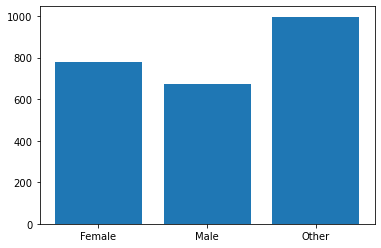

In [61]:
plt.bar(user_type_df.index, user_type_df.duration_sec)

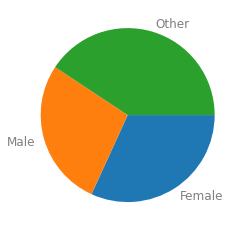

In [62]:
plt.pie(
    user_type_df.duration_sec, 
    labels=user_type_df.index, 
    counterclock=False, 
    textprops={"fontsize": 12, 'color': 'grey'}
);

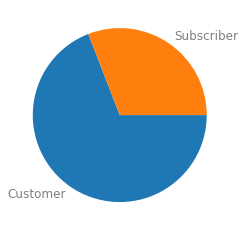

In [63]:
user_type_df = trip_df.groupby('user_type').mean()
plt.pie(
    user_type_df.duration_sec, 
    labels=user_type_df.index, 
    counterclock=False, 
    textprops={"fontsize": 12, 'color': 'grey'}
);

The average trip duration of **Customer** user type is two times higher than the average trip duration of **Subscriber** user type where the **Customer Average Trip Duration** is around 1,432.47 seconds and **Subscriber Average Trip Duration** is 640.26 seconds

### when are most trips taken in terms of day of the week in respect to user type ( QUESTION )

In [64]:
# reset the index of day trip dataset
new_df = day_idx_trip_df.reset_index()

In [103]:
# group the dataset by user type and start time ( weekday equivalent )
type_n_day_df = df[['start_time', 'user_type', 'duration_sec']].copy()
type_n_day_df['week_day'] = type_n_day_df['start_time'].apply(lambda x: x.strftime("%A"))
type_n_day_df = type_n_day_df.groupby(['user_type', 'week_day']).count().reset_index()

In [104]:
# confirm code result
week_day = pd.api.types.CategoricalDtype(
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
week_day

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=False)

In [105]:
type_n_day_df['week_day'] = type_n_day_df['week_day'].astype(week_day)

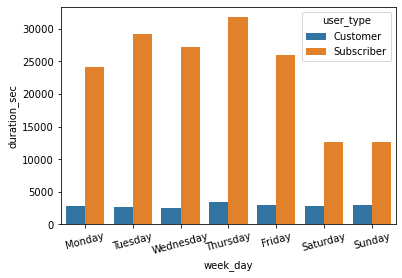

In [106]:
# create a barplot mapping the dataset
sb.barplot(data=type_n_day_df, x="week_day", y="duration_sec", hue="user_type")
plt.xticks(rotation=15);

_All trips recorded for Customer falls below 5,000 seconds for trip duration for all weekday with the highest being Thursday with 3,030 duration in seconds. Subscriber takes the highest duration with the maximum recorded trip duration seconds around 30,200 for thursday._

### when are most trips taken in terms of time of the day for user type ( QUESTION )

In [107]:
time_idx_trip_df.sample(2)

,end_time,duration_sec,user_type,bike_share_for_all_trip,bike_id
start_time,,,,,
12:02,2019-02-22 12:55:36.718,327,Subscriber,Yes,2007
14:02,2019-02-07 14:43:14.146,777,Subscriber,No,4805


In [108]:
new_time_df = time_idx_trip_df.reset_index()[['start_time', 'duration_sec', 'user_type']].copy()

In [109]:
new_time_df

,start_time,duration_sec,user_type
0,17:02,52185,Customer
1,18:02,42521,Customer
2,12:02,61854,Customer
3,17:02,36490,Subscriber
4,23:02,1585,Subscriber
...,...,...,...
183407,00:02,480,Subscriber
183408,00:02,313,Subscriber
183409,00:02,141,Subscriber
183410,00:02,139,Subscriber


In [110]:
# Group by user_type and start_time and reset the aggregated count index ( so the index is not made of the grouped variable )
grouped_time_df = new_time_df.groupby(['user_type', 'start_time']).count().reset_index()

In [111]:
# check 5 sample 
grouped_time_df.sample(5)

,user_type,start_time,duration_sec
15,Customer,15:02,1422
5,Customer,05:02,75
1,Customer,01:02,55
42,Subscriber,18:02,15311
2,Customer,02:02,57


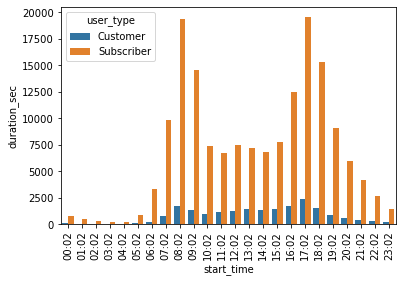

In [112]:
# map a barplot with the of the start time in comparison to the user type for the duration for each trip
sb.barplot(data=grouped_time_df, x="start_time", hue="user_type", y="duration_sec")
plt.xticks(rotation=90);

_Trip duration for **Subscriber** is way higher than that of **Customer** where the peak for Subscriber is about **20,000** seconds recorded at a timestamp of 17:02 ( 5:02pm ). At this same timestamp ( 5:02pm ) the **Customer** user type trip duration also peaked at about **2,500**_

### Feeding My Curiousity

having run some explorations on the dataset, getting into each questions as relayed from the project initials, i'll proceed a little further to feed my curiosity by exploring some more. Some questions that comes to mind are

- which station was most trip started from  ?
- which station was most trip ended at ?
- Which user type has the most transaction record ? and the age group ?
- Which is the most popular route ?
- Gender with most rides ?
- Does any of the above a determinant of the user type ?

To answer above questions, some cleaning will be carried on some of the variables. from [Observations](#Observations) above we found that couple of variables has got some missing values. Those missing records wouldn't be relevant in our analysis which would warrant we clean them off.

In [113]:
# reobserving the main dataset
df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
74273,1468,2019-02-19 10:41:47.572,2019-02-19 11:06:15.943,218.0,DeFremery Park,37.812331,-122.285171,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,6422,Subscriber,1980.0,Male,No
123930,560,2019-02-11 08:55:49.897,2019-02-11 09:05:10.492,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,5413,Subscriber,1973.0,Male,No
55713,236,2019-02-21 09:47:15.670,2019-02-21 09:51:12.581,85.0,Church St at Duboce Ave,37.770083,-122.429156,75.0,Market St at Franklin St,37.773793,-122.421239,5037,Subscriber,1982.0,Male,Yes


the variable listed in my curiousity research are **station** ( name ), **user_type**, **age**, **gender**. we'll take a quick observations on the listed varaiables

In [114]:
curiousity_df = df[['user_type', 'start_station_name', 'end_station_name', 'member_birth_year', 'member_gender', 'duration_sec']].copy()

In [115]:
curiousity_df.shape

(183412, 6)

In [116]:
# check the datatype of the subset 
curiousity_df.dtypes

user_type             category
start_station_name      object
end_station_name        object
member_birth_year      float64
member_gender           object
duration_sec             int64
dtype: object

In [117]:
# check 3 sample observation
curiousity_df.sample(3)

,user_type,start_station_name,end_station_name,member_birth_year,member_gender,duration_sec
94198,Customer,Salesforce Transit Center (Natoma St at 2nd St),Rhode Island St at 17th St,1982.0,Male,790
77453,Subscriber,Harrison St at 20th St,Bryant St at 15th St,1985.0,Female,332
162134,Subscriber,Post St at Kearny St,5th St at Folsom,1984.0,Female,465


In [118]:
# check total NaN records
curiousity_df.isna().sum()

user_type                0
start_station_name     197
end_station_name       197
member_birth_year     8265
member_gender         8265
duration_sec             0
dtype: int64

To remove NaN records we'll pay attention to the question we're answering as not all questions warrant the removal of other record due to other variable with null entry

#### Finding Age Bracket

_what's the age bracket of the user in the dataset_

In [119]:
# copy member_birth_year column off curiousity dataset
age_bracket_df = curiousity_df[['member_birth_year', 'member_gender']].copy()
# check copy sample
age_bracket_df.sample(2)

,member_birth_year,member_gender
132182,1986.0,Female
46096,1977.0,Male


In [120]:
# bracket age into different generations
def segment_gen(x):
    if x < 1946:
        return "Silent Generation"
    
    elif x >= 1946 and x <= 1964:
        return "Baby Boomers"
    
    elif x >= 1965 and x <= 1980:
        return "Gen X"
    
    elif x >= 1981 and x <= 1996:
        return "Millenial"
    
    return "Gen Z"
    

age_bracket_df['generation'] = age_bracket_df['member_birth_year'].apply(segment_gen)

In [121]:
# check the sample
age_bracket_df.sample(4)

,member_birth_year,member_gender,generation
97779,1986.0,Male,Millenial
142283,1990.0,Female,Millenial
145342,1989.0,Female,Millenial
36686,1990.0,Female,Millenial


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

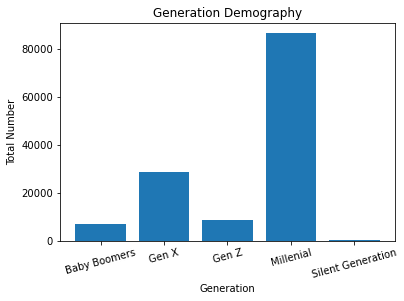

In [122]:
# aggregate ages by generation and see the count
generation_df = (
    age_bracket_df.drop('member_birth_year', axis=1)
    .groupby('generation').value_counts()
    .reset_index(name="gen_count")
)

plt.bar(generation_df.generation, generation_df.gen_count)
plt.xlabel("Generation")
plt.ylabel("Total Number")
plt.title("Generation Demography")
plt.xticks(rotation=15)

In [123]:
generation_df.head()

,generation,member_gender,gen_count
0,Baby Boomers,Male,6848
1,Baby Boomers,Female,1653
2,Baby Boomers,Other,207
3,Gen X,Male,28592
4,Gen X,Female,7082


<AxesSubplot:xlabel='generation'>

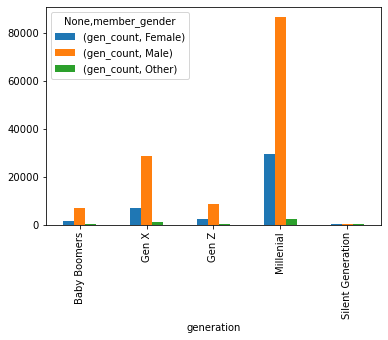

In [124]:
gen_pivot = generation_df.pivot_table(['gen_count'], index=['generation'], dropna=True, columns=['member_gender'])
gen_pivot.plot(kind="bar")

_female millenial tops the record_

#### Find Total User Type by Generation & Sex

##### Data preperation

In [125]:
# retrieve data to compute the targeted member type
user_type_df = curiousity_df[['member_birth_year', 'member_gender', 'user_type']].copy()
# remove those year with NaN values
user_type_df = user_type_df[user_type_df['member_birth_year'].isna() != True]
# segment user by their birth year into their different generations
user_type_df['generation'] = user_type_df['member_birth_year'].apply(segment_gen)
# confirm that the data was
user_type_df

,member_birth_year,member_gender,user_type,generation
0,1984.0,Male,Customer,Millenial
2,1972.0,Male,Customer,Gen X
3,1989.0,Other,Subscriber,Millenial
4,1974.0,Male,Subscriber,Gen X
5,1959.0,Male,Subscriber,Baby Boomers
...,...,...,...,...
183407,1996.0,Male,Subscriber,Millenial
183408,1984.0,Male,Subscriber,Millenial
183409,1990.0,Male,Subscriber,Millenial
183410,1988.0,Male,Subscriber,Millenial


In [126]:
# Generating the total count of user type in a separate column type_count
user_type_count =  (
    user_type_df.drop('member_birth_year', axis=1)
    .groupby('user_type').value_counts()
    .reset_index(name="type_count")
)
user_type_count

,user_type,member_gender,generation,type_count
0,Customer,Male,Millenial,7724
1,Customer,Female,Millenial,3405
2,Customer,Male,Gen X,2431
3,Customer,Male,Gen Z,856
4,Customer,Female,Gen X,729
5,Customer,Male,Baby Boomers,505
6,Customer,Other,Millenial,355
7,Customer,Female,Gen Z,355
8,Customer,Female,Baby Boomers,157
9,Customer,Other,Gen X,64


##### Evaluate ( user type count X gender )

In [127]:
grouped_type_sex = user_type_count.groupby(['user_type', 'member_gender'])['type_count'].sum().reset_index(name="type_count")
grouped_type_sex

,user_type,member_gender,type_count
0,Customer,Female,4647
1,Customer,Male,11529
2,Customer,Other,455
3,Subscriber,Female,36197
4,Subscriber,Male,119122
5,Subscriber,Other,3197


<AxesSubplot:xlabel='user_type', ylabel='type_count'>

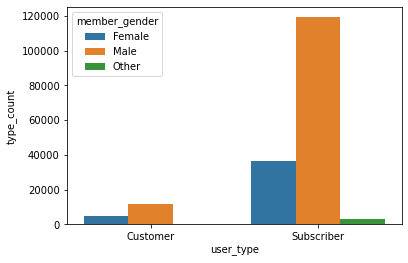

In [128]:
sb.barplot(data=grouped_type_sex, x='user_type', y='type_count', hue='member_gender')

##### Evaluate ( User Type  X Generation )

In [129]:
grouped_type_gen = user_type_count.groupby(['user_type', 'generation'])['type_count'].sum().reset_index(name="type_count")
grouped_type_gen

,user_type,generation,type_count
0,Customer,Baby Boomers,682
1,Customer,Gen X,3224
2,Customer,Gen Z,1225
3,Customer,Millenial,11484
4,Customer,Silent Generation,16
5,Subscriber,Baby Boomers,8026
6,Subscriber,Gen X,33384
7,Subscriber,Gen Z,9704
8,Subscriber,Millenial,107048
9,Subscriber,Silent Generation,354


<AxesSubplot:xlabel='user_type', ylabel='type_count'>

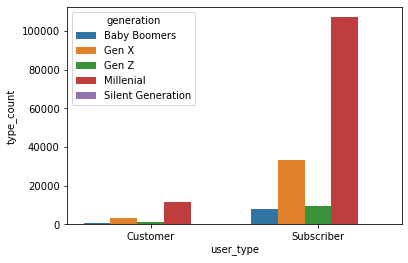

In [130]:
sb.barplot(data=grouped_type_gen, x='user_type', y='type_count', hue='generation')

#### which station was most trip started from ? ( Questions )

to answer this question, either we have to prefill the missing station names using google maps api ( [see here](#Explanatory-Data-Analysis) ) or take them off. 

For now i'll take them off as the observations (197) wouldn't have much impact on our analysis when removed from dataset of about 183,412.

In [131]:
# remove those entries with null values
cleaned_start_station_name_df = curiousity_df[curiousity_df['start_station_name'].isna() == False]

In [132]:
# check that there're no more null values for start_station_name
cleaned_start_station_name_df.isna().sum()

user_type                0
start_station_name       0
end_station_name         0
member_birth_year     8263
member_gender         8263
duration_sec             0
dtype: int64

Seems the observations which had start_station_name as null where also records with end_station_name as null.

In [133]:
# check 3 sample from the observations
cleaned_start_station_name_df.sample(3)

,user_type,start_station_name,end_station_name,member_birth_year,member_gender,duration_sec
35767,Customer,Powell St BART Station (Market St at 4th St),Howard St at Mary St,NaN,NaN,614
29649,Subscriber,North Berkeley BART Station,Addison St at Fourth St,1980.0,Female,481
16426,Subscriber,Howard St at 8th St,8th St at Brannan St,1984.0,Male,274


In [134]:
# check the unique count of start_station_name
cleaned_start_station_name_df.start_station_name.nunique()

329

In [135]:
# get the frequency count of each station
start_station_sized_count_df = cleaned_start_station_name_df.groupby('start_station_name').size().reset_index(name="count")

In [136]:
start_station_sized_count_df.sample(3)

,start_station_name,count
55,55th St at Telegraph Ave,129
178,Jackson St at 11th St,143
248,Ryland Park,434


##### Finding the station where most trips where started from

In [137]:
# check for the max count value
start_station_sized_count_df['count'].max()

3904

In [138]:
# retrieve the station with the highest number of trip recorded
start_station_sized_count_df[start_station_sized_count_df['count'] == 3904]

,start_station_name,count
199,Market St at 10th St,3904


_The station where most trip are started from is __Market St at 10th St__ holding a value of **3904** trips recorded to had started from it_

##### Finding the station where least trips where started from

In [139]:
# check for the min count
start_station_sized_count_df['count'].min()

2

In [140]:
# retrieve the station with the lowest number of trip recorded
start_station_sized_count_df[start_station_sized_count_df['count'] == 2]

,start_station_name,count
10,16th St Depot,2


_The station where the least trip are started from is __16th St Depot__ holding a value of **2** trips recorded to had started from it_

##### Binning each station into tiers to find the the busiest stations

In [141]:
# group into counts into bins
bins = [0, 500, 1000, 5000]
labels = ['low', 'mid', 'high']
start_station_sized_count_df['tiers'] = pd.cut(x=start_station_sized_count_df['count'], bins=bins, labels=labels, include_lowest=True)

In [142]:
start_station_sized_count_df.sample(3)

,start_station_name,count,tiers
223,Myrtle St at Polk St,828,mid
260,San Francisco Caltrain Station 2 (Townsend St...,3544,high
161,Harmon St at Adeline St,158,low


<AxesSubplot:xlabel='tiers', ylabel='count'>

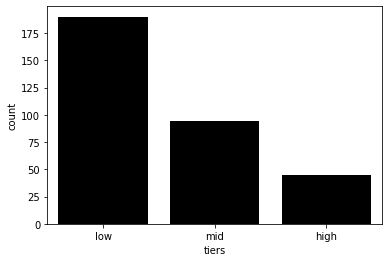

In [143]:
# check the tiers within which majority of the observations falls into
sb.countplot(x='tiers', data=start_station_sized_count_df, color='black')

In [144]:
start_station_sized_count_df.groupby('tiers').count()

,start_station_name,count
tiers,,
low,190,190
mid,94,94
high,45,45


_majority of the observations falls within the range of 0 - 500, with 190 records aggregated by their station name. Second tier is the mid tier ranking third with 94 observations and high tier with 45 observations_

It shows that most busiest stations are not as much as the least busy station

In [145]:
cleaned_start_station_name_df.duration_sec.describe()

count    183215.000000
mean        725.902017
std        1795.078654
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [146]:
# create a facet grid to explore stations that falls within the high tier ( 1000 - 5000 ) record 
# start_station_name_in_high_tier = start_station_sized_count_df[start_station_sized_count_df['tiers'] == 'high'].start_station_name
# g = sb.FacetGrid(
#     data=cleaned_start_station_name_df[cleaned_start_station_name_df['start_station_name'].isin(start_station_name_in_high_tier)], 
#     col='start_station_name',
#     hue='user_type',
#     col_wrap=5,
# )

# g.map(plt.hist, 'duration_sec')
# g.set_titles('{col_name}')

##### Which user type spent the most duration in seconds ?

In [147]:
new_df = cleaned_start_station_name_df[['duration_sec', 'user_type', 'start_station_name', 'member_gender']].copy()

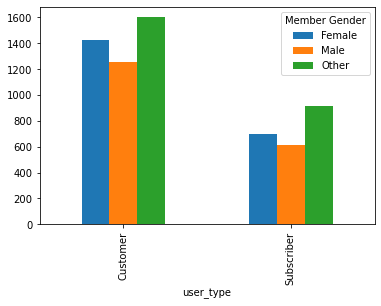

In [148]:
new_df.pivot_table(['duration_sec'], index=['user_type'], dropna=True, columns=['member_gender']).plot(kind="bar")
plt.legend(['Female', 'Male', 'Other'], title="Member Gender")

_Unspecified user type, known as **Others** in the dataset has much more trip duration for both customer and subscribers_

#### Busiest Route

_seeking to answer_
- _which route is the busiest route ?_

##### Data preparation

In [149]:
# create copy of the relevant variables to answer the question
routes_df = cleaned_start_station_name_df[['duration_sec', 'start_station_name', 'end_station_name']].copy()

In [150]:
# generate route variable
routes_df['route'] = routes_df['start_station_name'] + ' to ' + routes_df['end_station_name']

In [151]:
# confirm the sample
routes_df.sample(3)

,duration_sec,start_station_name,end_station_name,route
131147,556,San Francisco Caltrain Station 2 (Townsend St...,11th St at Natoma St,San Francisco Caltrain Station 2 (Townsend St...
28470,916,Doyle St at 59th St,West Oakland BART Station,Doyle St at 59th St to West Oakland BART Station
159721,660,Mechanics Monument Plaza (Market St at Bush St),San Francisco Public Library (Grove St at Hyde...,Mechanics Monument Plaza (Market St at Bush St...


In [152]:
# Group by route column and count the unqiue rows in the dataframe
routes_df = routes_df.groupby('route').value_counts().reset_index(name="count").sort_values('count', ascending=False)

In [153]:
# get total trip completed for a route
total_route_trips_df = routes_df.groupby('route')['count'].sum().reset_index(name='total').sort_values('total', ascending=False)
# get the total duration in seconds for each route
total_route_trips_sec_df = routes_df.groupby('route')['duration_sec'].sum().reset_index(name='total_sec').sort_values('total_sec', ascending=False)

In [154]:
# drop 'duration in second' 'count', and 'station start & end name' as they've completed their desired tasks
routes_df = routes_df.drop(['duration_sec', 'count', 'start_station_name', 'end_station_name'], axis=1).drop_duplicates()

# merge total trips to routes dataframe
routes_df = routes_df.merge(total_route_trips_df, on="route", how='inner')

# merge total duration in seconds routes dataframe
routes_df = routes_df.merge(total_route_trips_sec_df, on='route', how='inner')

# confirm dataframe
routes_df

,route,total,total_sec
0,Bancroft Way at College Ave to Bancroft Way at...,223,20139
1,Market St at 10th St to Powell St BART Station...,247,69256
2,Embarcadero BART Station (Beale St at Market S...,160,24530
3,19th Street BART Station to Grand Ave at Perki...,284,118350
4,Townsend St at 7th St to San Francisco Caltrai...,272,31184
...,...,...,...
23643,Dolores St at 15th St to Raymond Kimbell Playg...,2,1974
23644,Dolores St at 15th St to Rhode Island St at 17...,1,712
23645,Dolores St at 15th St to San Francisco Public ...,5,3026
23646,Dolores St at 15th St to San Francisco Ferry B...,12,13786


##### Top 10 busiest routes

In [155]:
top_ten = routes_df.sort_values('total', ascending=False)[:10]
top_ten

,route,total,total_sec
6,Berry St at 4th St to San Francisco Ferry Buil...,337,158804
5,San Francisco Ferry Building (Harry Bridges Pl...,314,213604
7,Grand Ave at Perkins St to 19th Street BART St...,310,71721
21,The Embarcadero at Sansome St to Steuart St at...,285,98924
3,19th Street BART Station to Grand Ave at Perki...,284,118350
4,Townsend St at 7th St to San Francisco Caltrai...,272,31184
15,Market St at 10th St to Montgomery St BART Sta...,272,107362
22,San Fernando St at 7th St to 5th St at Virgini...,249,108131
1,Market St at 10th St to Powell St BART Station...,247,69256
74,5th St at Virginia St to San Fernando St at 7t...,242,91173


In [156]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

def set_font(ss=SMALL_SIZE, ms=MEDIUM_SIZE, bs=BIGGER_SIZE):
    plt.rc('font', size=ss)          # controls default text sizes
    plt.rc('axes', titlesize=ss)     # fontsize of the axes title
    plt.rc('axes', labelsize=ms)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=ss)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=ss)    # fontsize of the tick labels
    plt.rc('legend', fontsize=ss)    # legend fontsize
    plt.rc('figure', titlesize=bs)  # fontsize of the figure title

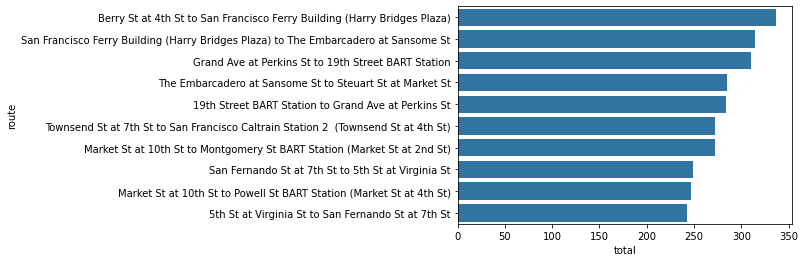

In [157]:
sb.barplot(data=top_ten, y='route', x='total', color=sb.color_palette()[0], ci=60)
set_font(ss=8, ms=10, bs=10)

_Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza) is the busiest route with 337. This goes on to show that station where most street is started from routes to diverse end location. Although this in turn didn't make it the first on the route mostly travelled, but it still made it to the top 10 appearing in 7th & 9th position_

_does being the busiest correlates with the total duration spent on a trip ?_ 

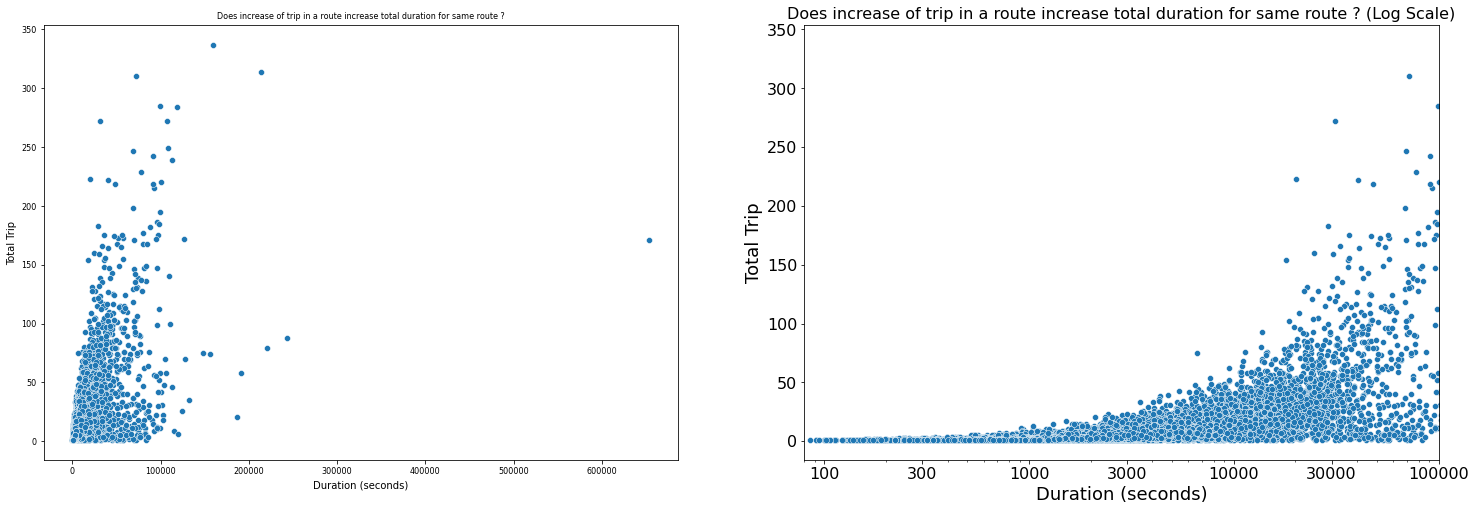

In [158]:
plt.figure(figsize=[25, 8])

plt.subplot(1, 2, 1)
sb.scatterplot(x=routes_df.total_sec, y=routes_df.total)
plt.title('Does increase of trip in a route increase total duration for same route ?')
plt.ylabel('Total Trip')
plt.xlabel('Duration (seconds)')
set_font()

plt.subplot(1, 2, 2)
sb.scatterplot(x=routes_df.total_sec, y=routes_df.total)
plt.title('Does increase of trip in a route increase total duration for same route ? (Log Scale)')
plt.xscale('log')
ticks = [100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
plt.xticks(ticks, ticks)
plt.xlim(80, 100000)
plt.ylabel('Total Trip')
plt.xlabel('Duration (seconds)')
set_font()

_the more duration spent on a trip has a steep measure on the total number of trip done for a given trip route. That is to say, majority of the trip takes lesser duration to complete and an aggregate of them doesn't amount much on the duration_

#### Some other curious questions

- _on which day is the most busiest route having it's busiest ride sharing ?_
- _as a bike sharing system, how many trip has a single bike taken on ? has this resulted in a wear and tear that has made which in turn has led to greater duration time ?_